## Matplotlib Assignment

### Load necessary Packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np 
import pandas as pd 

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

### Set Korean Language

In [2]:
#한글 설정 
mpl.rcParams['axes.unicode_minus'] = False # minus 표시 
#mpl.rc('axes', unicode_minus=False)

In [4]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
# mpl.rc('font', family='Malgun Gothic')

In [5]:
mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False)

### Q1
여러가지 함수를 사용하여 아래 조건에 맞는 그래프를 그린다.
- xlabel, ylabel, title을 모두 갖추고 있어야 한다.
- 하나의 Figure(일단, 그림이라고 이해한다. 아래에 자세한 설명이 있다.)에 3개 이상의 Plot을 그린다.
- 각 Plot은 다른 선, 마크, 색 스타일을 가진다.
- legend는 그래프와 겹치지 않는 곳에 위치 시키도록 한다.

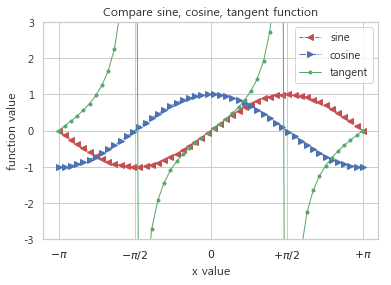

In [7]:
X = np.linspace(-np.pi, np.pi, 50)
S, C, T = np.sin(X), np.cos(X), np.tan(X)
plt.title("Compare sine, cosine, tangent function")
plt.plot(X, S, ls="--", lw=1, label="sine", marker="<", c="r")
plt.plot(X, C, ls="-.", lw=1, label="cosine", marker=">", c="b")
plt.plot(X, T, ls="-", lw=1, label="tangent", marker=".", c="g")
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(-3,3)
plt.xlabel("x value")
plt.ylabel("function value")
plt.legend(loc=0)
plt.show()

### Q2 
여러가지 함수를 사용하여 subplot들로 구성된 그림을 그려보자. 모든 subplot에 대해 xlabel, ylabel, title이 있어야 한다.


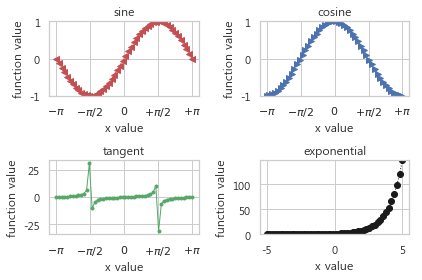

In [8]:
X = np.linspace(-np.pi, np.pi, 50)
S, C, T = np.sin(X), np.cos(X), np.tan(X)
X1 = np.linspace(-5, 5, 50)
E = np.exp(X1)

plt.subplot(221)
plt.plot(X, S, ls="--", lw=1, label="sine", marker="<", c="r")
plt.title("sine")
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(-1,1)
plt.xlabel("x value")
plt.ylabel("function value")

plt.subplot(222)
plt.plot(X, C, ls="-.", lw=1, label="cosine", marker=">", c="b")
plt.title("cosine")
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(-1,1)
plt.xlabel("x value")
plt.ylabel("function value")

plt.subplot(223)
plt.plot(X, T, ls="-", lw=1, label="tangent", marker=".", c="g")
plt.title("tangent")
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.xlabel("x value")
plt.ylabel("function value")

plt.subplot(224)
plt.plot(X1, E, ls=":", lw=1, label="exponential", marker="o", c="k")
plt.ylim(0,np.exp(5))
plt.title("exponential")
plt.xlabel("x value")
plt.ylabel("function value")

plt.tight_layout()
plt.show()

### Q3
- Matplotlib 갤러리 웹사이트에서 관심있는 예제 코드를 하나 고른다.
    - http://matplotlib.org/gallery.html
- 예제 코드에 사용된 Matplotlib API 명령의 목록을 만들고 Matplotlib 웹사이트에서 관련 링크를 찾아 내용을 정리한다.
- 변형된 형태의 플롯을 만들어본다.

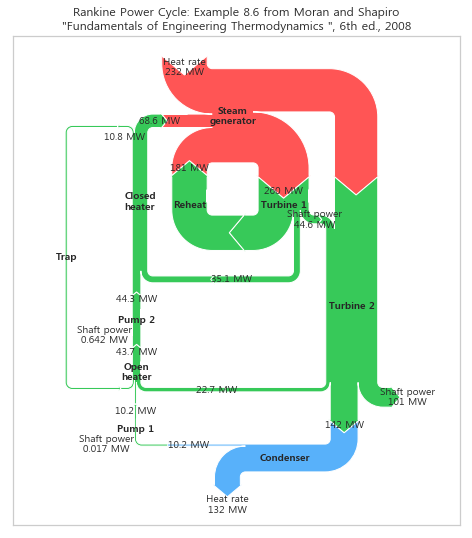

In [9]:
"""
===================
Rankine power cycle
===================

Demonstrate the Sankey class with a practical example of a Rankine power
cycle.

"""
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Rankine Power Cycle: Example 8.6 from Moran and "
                     "Shapiro\n\x22Fundamentals of Engineering Thermodynamics "
                     "\x22, 6th ed., 2008")
Hdot = [260.431, 35.078, 180.794, 221.115, 22.700,
        142.361, 10.193, 10.210, 43.670, 44.312,
        68.631, 10.758, 10.758, 0.017, 0.642,
        232.121, 44.559, 100.613, 132.168]  # MW
sankey = Sankey(ax=ax, format='%.3G', unit=' MW', gap=0.5, scale=1.0/Hdot[0])
sankey.add(patchlabel='\n\nPump 1', rotation=90, facecolor='#37c959',
           flows=[Hdot[13], Hdot[6], -Hdot[7]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.883, 0.25],
           orientations=[1, -1, 0])
sankey.add(patchlabel='\n\nOpen\nheater', facecolor='#37c959',
           flows=[Hdot[11], Hdot[7], Hdot[4], -Hdot[8]],
           labels=[None, '', None, None],
           pathlengths=[0.25, 0.25, 1.93, 0.25],
           orientations=[1, 0, -1, 0], prior=0, connect=(2, 1))
sankey.add(patchlabel='\n\nPump 2', facecolor='#37c959',
           flows=[Hdot[14], Hdot[8], -Hdot[9]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.25, 0.25],
           orientations=[1, 0, 0], prior=1, connect=(3, 1))
sankey.add(patchlabel='Closed\nheater', trunklength=2.914, fc='#37c959',
           flows=[Hdot[9], Hdot[1], -Hdot[11], -Hdot[10]],
           pathlengths=[0.25, 1.543, 0.25, 0.25],
           labels=['', '', None, None],
           orientations=[0, -1, 1, -1], prior=2, connect=(2, 0))
sankey.add(patchlabel='Trap', facecolor='#37c959', trunklength=5.102,
           flows=[Hdot[11], -Hdot[12]],
           labels=['\n', None],
           pathlengths=[1.0, 1.01],
           orientations=[1, 1], prior=3, connect=(2, 0))
sankey.add(patchlabel='Steam\ngenerator', facecolor='#ff5555',
           flows=[Hdot[15], Hdot[10], Hdot[2], -Hdot[3], -Hdot[0]],
           labels=['Heat rate', '', '', None, None],
           pathlengths=0.25,
           orientations=[1, 0, -1, -1, -1], prior=3, connect=(3, 1))
sankey.add(patchlabel='\n\n\nTurbine 1', facecolor='#37c959',
           flows=[Hdot[0], -Hdot[16], -Hdot[1], -Hdot[2]],
           labels=['', None, None, None],
           pathlengths=[0.25, 0.153, 1.543, 0.25],
           orientations=[0, 1, -1, -1], prior=5, connect=(4, 0))
sankey.add(patchlabel='\n\n\nReheat', facecolor='#37c959',
           flows=[Hdot[2], -Hdot[2]],
           labels=[None, None],
           pathlengths=[0.725, 0.25],
           orientations=[-1, 0], prior=6, connect=(3, 0))
sankey.add(patchlabel='Turbine 2', trunklength=3.212, facecolor='#37c959',
           flows=[Hdot[3], Hdot[16], -Hdot[5], -Hdot[4], -Hdot[17]],
           labels=[None, 'Shaft power', None, '', 'Shaft power'],
           pathlengths=[0.751, 0.15, 0.25, 1.93, 0.25],
           orientations=[0, -1, 0, -1, 1], prior=6, connect=(1, 1))
sankey.add(patchlabel='Condenser', facecolor='#58b1fa', trunklength=1.764,
           flows=[Hdot[5], -Hdot[18], -Hdot[6]],
           labels=['', 'Heat rate', None],
           pathlengths=[0.45, 0.25, 0.883],
           orientations=[-1, 1, 0], prior=8, connect=(2, 0))
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
# Notice that the explicit connections are handled automatically, but the
# implicit ones currently are not.  The lengths of the paths and the trunks
# must be adjusted manually, and that is a bit tricky.

plt.show()

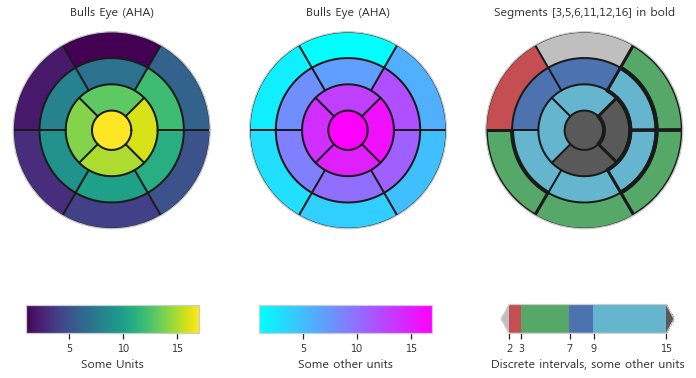

In [10]:
"""
This example demonstrates how to create the 17 segment model for the left
ventricle recommended by the American Heart Association (AHA).
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def bullseye_plot(ax, data, segBold=None, cmap=None, norm=None):
    """
    Bullseye representation for the left ventricle.

    Parameters
    ----------
    ax : axes
    data : list of int and float
        The intensity values for each of the 17 segments
    segBold: list of int, optional
        A list with the segments to highlight
    cmap : ColorMap or None, optional
        Optional argument to set the desired colormap
    norm : Normalize or None, optional
        Optional argument to normalize data into the [0.0, 1.0] range


    Notes
    -----
    This function create the 17 segment model for the left ventricle according
    to the American Heart Association (AHA) [1]_

    References
    ----------
    .. [1] M. D. Cerqueira, N. J. Weissman, V. Dilsizian, A. K. Jacobs,
        S. Kaul, W. K. Laskey, D. J. Pennell, J. A. Rumberger, T. Ryan,
        and M. S. Verani, "Standardized myocardial segmentation and
        nomenclature for tomographic imaging of the heart",
        Circulation, vol. 105, no. 4, pp. 539-542, 2002.
    """
    if segBold is None:
        segBold = []

    linewidth = 2
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0.2, 1, 4)

    # Create the bound for the segment 17
    for i in range(r.shape[0]):
        ax.plot(theta, np.repeat(r[i], theta.shape), '-k', lw=linewidth)

    # Create the bounds for the segments  1-12
    for i in range(6):
        theta_i = i*60*np.pi/180
        ax.plot([theta_i, theta_i], [r[1], 1], '-k', lw=linewidth)

    # Create the bounds for the segments 13-16
    for i in range(4):
        theta_i = i*90*np.pi/180 - 45*np.pi/180
        ax.plot([theta_i, theta_i], [r[0], r[1]], '-k', lw=linewidth)

    # Fill the segments 1-6
    r0 = r[2:4]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i*128:i*128+128] + 60*np.pi/180
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128, 2))*data[i]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i+1 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth+2)
            ax.plot(theta0[0], [r[2], r[3]], '-k', lw=linewidth+1)
            ax.plot(theta0[-1], [r[2], r[3]], '-k', lw=linewidth+1)

    # Fill the segments 7-12
    r0 = r[1:3]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i*128:i*128+128] + 60*np.pi/180
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128, 2))*data[i+6]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i+7 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth+2)
            ax.plot(theta0[0], [r[1], r[2]], '-k', lw=linewidth+1)
            ax.plot(theta0[-1], [r[1], r[2]], '-k', lw=linewidth+1)

    # Fill the segments 13-16
    r0 = r[0:2]
    r0 = np.repeat(r0[:, np.newaxis], 192, axis=1).T
    for i in range(4):
        # First segment start at 45 degrees
        theta0 = theta[i*192:i*192+192] + 45*np.pi/180
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((192, 2))*data[i+12]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i+13 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth+2)
            ax.plot(theta0[0], [r[0], r[1]], '-k', lw=linewidth+1)
            ax.plot(theta0[-1], [r[0], r[1]], '-k', lw=linewidth+1)

    # Fill the segments 17
    if data.size == 17:
        r0 = np.array([0, r[0]])
        r0 = np.repeat(r0[:, np.newaxis], theta.size, axis=1).T
        theta0 = np.repeat(theta[:, np.newaxis], 2, axis=1)
        z = np.ones((theta.size, 2))*data[16]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if 17 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth+2)

    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])


# Create the fake data
data = np.array(range(17)) + 1


# Make a figure and axes with dimensions as desired.
fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=3,
                       subplot_kw=dict(projection='polar'))
fig.canvas.set_window_title('Left Ventricle Bulls Eyes (AHA)')

# Create the axis for the colorbars
axl = fig.add_axes([0.14, 0.15, 0.2, 0.05])
axl2 = fig.add_axes([0.41, 0.15, 0.2, 0.05])
axl3 = fig.add_axes([0.69, 0.15, 0.2, 0.05])


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=1, vmax=17)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(axl, cmap=cmap, norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap2 = mpl.cm.cool
norm2 = mpl.colors.Normalize(vmin=1, vmax=17)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb2 = mpl.colorbar.ColorbarBase(axl2, cmap=cmap2, norm=norm2,
                                orientation='horizontal')
cb2.set_label('Some other units')


# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap3 = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap3.set_over('0.35')
cmap3.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [2, 3, 7, 9, 15]
norm3 = mpl.colors.BoundaryNorm(bounds, cmap3.N)
cb3 = mpl.colorbar.ColorbarBase(axl3, cmap=cmap3, norm=norm3,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                boundaries=[0]+bounds+[18],
                                extend='both',
                                ticks=bounds,  # optional
                                spacing='proportional',
                                orientation='horizontal')
cb3.set_label('Discrete intervals, some other units')


# Create the 17 segment model
bullseye_plot(ax[0], data, cmap=cmap, norm=norm)
ax[0].set_title('Bulls Eye (AHA)')

bullseye_plot(ax[1], data, cmap=cmap2, norm=norm2)
ax[1].set_title('Bulls Eye (AHA)')

bullseye_plot(ax[2], data, segBold=[3, 5, 6, 11, 12, 16],
              cmap=cmap3, norm=norm3)
ax[2].set_title('Segments [3,5,6,11,12,16] in bold')

plt.show()